# Numpy, les vecteurs et la vitesse

Ce support s'ets largement inspiré du travail de Lino Galiana, accessible [ici](https://pythonds.linogaliana.fr/content/manipulation/01_numpy.html). Il a été remanié pour correspondre aux besoins d'un cours plus introductif et non centré sur les usages en data science.

## Introduction

On suppose ici que les structures élémentaires de Python sont connues, en particulier les listes. Pour faire court, Numpy est une (vaste) librairie accélérant très sensiblement les calculs vectoriels et matriciels en optimisant les structures de données. Ainsi, les listes (et listes de listes) utilisées lorsqu'on débute pour représenter des vecteurs (et des matrices) laissent leur place à des `ndarrays` (pour n-dimensional arrays).

Première étape, indispensable : importer `numpy`.

In [2]:
import numpy as np

### Listes et `ndarrays` : parallèles et différences

Vues de loin, les deux structures sont très similaires. Prenons pour exemple une liste numérique et un ndarray simples.

In [3]:
L = [1,5,8]
a = np.array([1,5,8])

In [4]:
type(L), type(a)

(list, numpy.ndarray)

Les opérations standard sur les listes fonctionnent de la même manière : accès, affectations, slicing,... Au détail près que les types standard de Python ont été redéfénis dans Numpy en vue d'optimiser les calculs.

In [6]:
a[1], L[1]

(np.int64(5), 5)

In [7]:
a[2] = 3
L[2] = 3
a[2], L[2]

(np.int64(3), 3)

In [9]:
a[:2], L[:2]

(array([1, 5]), [1, 5])

Une différence notable toutefois : contrairement aux listes, qui peuvent conteinr des objets de types différents, Numpy n'autorise que les `ndarrays` homogènes. Cette contrainte est une condition nécessaire à l'optimisation du traitement de données.

Numpy redéfinit également un grand nombre de fonctions usuelles. Ici, l'exponentielle.

In [10]:
def h(x):
    return np.exp(-x**2)

Numpy permet de créer des intervalles de points régulièreent espacés.
Il suffit de préciser le bord gauche, le bord droit et le nombre de points désirés.
Attention aux inévitables effets "poteaux-barrières" (41 points et pas 40 dans l'exemple ci-dessous).

In [11]:
xt = np.linspace(-4,4,41)

In [12]:
xt

array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
       -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
        0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
        2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ])

Si l'on souhaite au contraire préciser l'intervalle désiré entre les points et laisser Numpy calculer le nombre de points nécessaires, la syntaxe devient similaire à celle de `range()` pour les listes : bord gauche, bord droit + une unité, pas de la subdivision.

In [15]:
yt = np.arange(-4.0,4.1,0.1)
yt

array([-4.00000000e+00, -3.90000000e+00, -3.80000000e+00, -3.70000000e+00,
       -3.60000000e+00, -3.50000000e+00, -3.40000000e+00, -3.30000000e+00,
       -3.20000000e+00, -3.10000000e+00, -3.00000000e+00, -2.90000000e+00,
       -2.80000000e+00, -2.70000000e+00, -2.60000000e+00, -2.50000000e+00,
       -2.40000000e+00, -2.30000000e+00, -2.20000000e+00, -2.10000000e+00,
       -2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        3.55271368e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  

### Broadcasting

Une des grandes forces de Numpy est sa capacité à _broadcast_ des opérations vectorielles ou matricielles. Pour faire court, le broadcast consiste à appliquer en parallèle une opération normalement définie sur les scalaires à tout un vecteur (plus généralement, un `ndarray`), coefficient par coefficient. Donnons-ici un exemple avec l'exponentielle.

In [13]:
ht = h(xt)

In [14]:
ht

array([1.12535175e-07, 5.35534780e-07, 2.35257520e-06, 9.54016287e-06,
       3.57128496e-05, 1.23409804e-04, 3.93669041e-04, 1.15922917e-03,
       3.15111160e-03, 7.90705405e-03, 1.83156389e-02, 3.91638951e-02,
       7.73047404e-02, 1.40858421e-01, 2.36927759e-01, 3.67879441e-01,
       5.27292424e-01, 6.97676326e-01, 8.52143789e-01, 9.60789439e-01,
       1.00000000e+00, 9.60789439e-01, 8.52143789e-01, 6.97676326e-01,
       5.27292424e-01, 3.67879441e-01, 2.36927759e-01, 1.40858421e-01,
       7.73047404e-02, 3.91638951e-02, 1.83156389e-02, 7.90705405e-03,
       3.15111160e-03, 1.15922917e-03, 3.93669041e-04, 1.23409804e-04,
       3.57128496e-05, 9.54016287e-06, 2.35257520e-06, 5.35534780e-07,
       1.12535175e-07])

In [16]:
zt = h(yt)

In [17]:
zt

array([1.12535175e-07, 2.47959602e-07, 5.35534780e-07, 1.13372714e-06,
       2.35257520e-06, 4.78511739e-06, 9.54016287e-06, 1.86437423e-05,
       3.57128496e-05, 6.70548243e-05, 1.23409804e-04, 2.22629857e-04,
       3.93669041e-04, 6.82328053e-04, 1.15922917e-03, 1.93045414e-03,
       3.15111160e-03, 5.04176026e-03, 7.90705405e-03, 1.21551783e-02,
       1.83156389e-02, 2.70518469e-02, 3.91638951e-02, 5.55762126e-02,
       7.73047404e-02, 1.05399225e-01, 1.40858421e-01, 1.84519524e-01,
       2.36927759e-01, 2.98197279e-01, 3.67879441e-01, 4.44858066e-01,
       5.27292424e-01, 6.12626394e-01, 6.97676326e-01, 7.78800783e-01,
       8.52143789e-01, 9.13931185e-01, 9.60789439e-01, 9.90049834e-01,
       1.00000000e+00, 9.90049834e-01, 9.60789439e-01, 9.13931185e-01,
       8.52143789e-01, 7.78800783e-01, 6.97676326e-01, 6.12626394e-01,
       5.27292424e-01, 4.44858066e-01, 3.67879441e-01, 2.98197279e-01,
       2.36927759e-01, 1.84519524e-01, 1.40858421e-01, 1.05399225e-01,
      

### Numpy et le temps gagné

Pourquoi s'embêter à redéfinir des objets qui existent dans la librairie standard depuis des lustres ? Pour le temps gagné. Imaginez un instant devoir traiter des matrices issues de l'analyse numérique d'équations aux dérivées partielles, qui peuvent typiquement être de format $10^6 \times 10^6$, sinon plus et peser des centaines de gigaoctets. Même chose avec des analyses de graphes issues de cas réels, avec des $10^5$, $10^6$ sommets.

Nous utiliserons ici la librairie `timeit`, spécialisée dans le chronométrage de fonctions. Le second argument indique le nombre de répétitions voulues, pour avoir des statistiques un peu plus fiables. Compte tenu des écarts observés et du caractère avant tout pédagogique de la démonstration, on ne se posera pas les questions habituelles de convergence ou de significativité.

In [18]:
import timeit

In [19]:
size = 1_000_000
python_list = list(range(1, size + 1))
numpy_array = np.arange(1, size + 1)

In [20]:
def python_sum_squares():
    return sum(x*x for x in python_list)

python_time = timeit.timeit(python_sum_squares, number=10)
print(f"Liste Python : {python_time:.5f} secondes pour 10 exécutions")
print(f"Moyenne par exécution : {python_time/10:.5f} secondes")

Liste Python : 0.79687 secondes pour 10 exécutions
Moyenne par exécution : 0.07969 secondes


In [21]:
def numpy_sum_squares():
    return np.sum(numpy_array**2)

numpy_time = timeit.timeit(numpy_sum_squares, number=10)
print(f"Tableau NumPy : {numpy_time:.5f} secondes pour 10 exécutions")
print(f"Moyenne par exécution : {numpy_time/10:.5f} secondes")

Tableau NumPy : 0.02360 secondes pour 10 exécutions
Moyenne par exécution : 0.00236 secondes


On peut, si on le souhaite, répéter nos batchs de 10 expériences et faire des statistiques par paquets sur les résultats. La différence entre les listes et les `ndarrays` est toujours aussi édifiante.

In [22]:
python_times = timeit.repeat(python_sum_squares, number=10, repeat=5)
numpy_times = timeit.repeat(numpy_sum_squares, number=10, repeat=5)

print(f"Liste Python : moyenne = {np.mean(python_times):.5f}s, écart-type = {np.std(python_times):.5f}s")
print(f"Tableau NumPy : moyenne = {np.mean(numpy_times):.5f}s, écart-type = {np.std(numpy_times):.5f}s")

Liste Python : moyenne = 0.68164s, écart-type = 0.01889s
Tableau NumPy : moyenne = 0.01283s, écart-type = 0.00157s


## Outils principaux

Le premier survol de Numpy terminé, nous pouvons rentrer dans les détails et présenter des outils un peu plus avancés. Nous reviendrons en particulier sur le broadcasting, dont nous n'avons montré qu'une toute petite partie de la versatilité.

### Des vecteurs aux matrices et au-delà

Si Numpy traite tous ses `ndarrays` de la même manière en mémoire, i.e. comme des "vecteurs", il est permis de donner des formats non unidimensionnels à ces objets. C'est un peu le sens du `nd` dans le nom du type. On peut en particulier définir des matrices, soit à la main, soit par une fonction annexe (numérique par exemple), soit en appelant une matrice usuelle (nulle, identité, pleine de $1$).

In [25]:
ex1 = np.array([[-1,1,-2],[-3,2,0]])
ex1, type(ex1)

(array([[-1,  1, -2],
        [-3,  2,  0]]),
 numpy.ndarray)

In [26]:
ex2 = np.zeros(5)
ex2, type(ex2)

(array([0., 0., 0., 0., 0.]), numpy.ndarray)

In [27]:
ex3 = np.zeros((2,4))
ex3, type(ex3)

(array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 numpy.ndarray)

In [28]:
ex4 = np.ones((2,3,4))
ex4, type(ex4)

(array([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]),
 numpy.ndarray)

Notez que les formats des `ndarrays` se lisent de droite à gauche : colonnes (4), lignes (3), profondeur (2) et au-delà. Pour la matrice identité, on ne précise évidemment qu'un seul paramètre de taille.

In [29]:
ex5 = np.eye(4)
ex5, type(ex5)

(array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 numpy.ndarray)

In [30]:
ex6 = np.full((3,5),np.pi)
ex6, type(ex6)

(array([[3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
        [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
        [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265]]),
 numpy.ndarray)

### Broadcasting et slicing

On a montré plus haut comment appliquer une fonction _numérique_ scalaire à un array par broadcasting, mais la puissance de l'outil ne s'arrête pas là. On peut également appliquer des fonctions _booléennes_, le résultat étant naturellement un `ndarray` de booléens, que l'on peut ensuite utiliser comme filtre.

In [31]:
ex7 = np.array([[-1,1,-2],[-3,2,0]])
ex7 > 0, type(ex7 > 0)

(array([[False,  True, False],
        [False,  True, False]]),
 numpy.ndarray)

De la même manière que l'on filtre les éléments d'une liste en appelant des indics particuliers, ou des `range` d'indices avec les `:`, on peut en Numpy filtrer directement par un _masque booléen_ issu d'un test logique.

In [34]:
ex7[ex7 > 0]

array([1, 2])

### Exercice : un peu d'aléatoire

La librairie Numpy contient la sous-librairie `random`, elle-même garnie de nombreux outils pour traiter l'aléatoire : générateurs, distributions de probabilités usuelles et bien d'autres. Nous allons jouer avec la loi normale, en dimension $1$ pour le moment. Sans précision des paramètres, la loi utilisée aura une moyenne de $0$ et un écart-type de $1$.

In [36]:
y = np.random.normal(size=10000)
y[:10]

array([-0.6879312 ,  0.56330912,  0.1709923 ,  2.01046989, -1.57010448,
       -0.51677863,  2.13254278, -0.49665725,  0.4798516 , -0.90171688])

Nous souhaitons déterminer les tirages qui dépassent, en valeur absolue, le seuil de significativité de  $5\%$. Comme chacun sait, ce seuil est numériquement proche de $1,\hspace{-0.1cm}96$. Comme nous l'avons vu plus haut, il nous faut créer le masque booléen, puis filtrer les valeurs de $y$ par ce masque.

In [40]:
z = np.abs(y) > 1.96
y2 = y[z]
y2[:10]

array([ 2.01046989,  2.13254278, -2.11129176, -2.12453177, -3.22442705,
       -2.70378523,  2.42087402,  2.3139379 ,  2.22155518,  2.23232059])

Supposons maintenant que l'on veuille connaître la contribution de ces valeurs extrêmes au total. Commençons par en connaître le nombre d'éléments, puis la somme.

In [42]:
len(y2)

513

On trouve environ $5\%$ de grandes valeurs (à une fluctuation de tirage près), ce qui est cohérent. Passons maintenant à la contribution en valeur absolue.

In [43]:
np.abs(y2).sum(), np.abs(y).sum(), np.abs(y2).sum()/np.abs(y).sum() * 100

(np.float64(1209.4041807606739),
 np.float64(8049.636132097977),
 np.float64(15.024333534011145))

En valeur absolue, les "grandes" valeurs de la gaussienne, au seuil de $5 \%$, contribuent pour environ $15 \%$ du total. Le nombre de "petites" valeurs vient donc compenser assez largement leur faible importance individuelle.

### Exercice : matrice de distances, en dimension 1

Cet exercice vise à faire pratiquer le broadacasting, tout en préparant le terrain pour construire un k-NN (k-plus proches voisins) rudimentaire. On introduit ainsi le mot-clé `newaxis` en se gardant la possibiltié de visualiser concrètement son effet.

On commence par créer un array de $10$ points sur $\mathbb{R}$, tirés selon une gaussienne centrée en $0$ et d'écart-type $2$. L'objectif est de construire la matrice $D$ des distances entre paires de points en quelques lignes.

In [48]:
X = np.random.normal(loc = 0, scale = 2, size=10)
X, X.shape

(array([-1.08455117,  0.80149224, -0.17820032, -2.29118418,  0.52952375,
         2.24340287, -4.39596512, -3.22035391, -2.32525869,  1.34402243]),
 (10,))

Pour construire la matrice des distances, il est naturel de commencer par construire la matrices des différences (sans valeur absolue) des coordonnées. Si l'on voit $X$ comme un vecteur ligne (par défaut, un `ndarray` $1D$ s'interprète comme des coefficients disposés sur une suite de colonnes), on a très envie de transposer $X$ en $^t X$, puis de calculer un objet qui ressemble à $^t X - X$.

Mathématiquement comme Numpyistiquement, cette opération n'a pas de sens telle quelle, même si l'idée est bonne. Du côté maths, on pourrait "étendre" $X$ et $^t X$ en des matrices de format $10 \times 10$ en recopiant les valeurs (en lignes ou en colonnes). Numpy a une conception un peu différente du problème et utilise le broadcasting pour réaliser cette "extension".

Quant à la transposition, les `ndarrays` possèdent bien une méthode `.T`, mais celle-ci a pour effet de renverser le tuple des dimensions. Pour une matrice (`ndarray` 2D), tout marche comme l'on veut. Pour un vecteur, l'opération n'a aucun effet. On doit donc, en Numpy, ruser en introduisant dès le départ une nouvelle dimension "vide" avec l'opérateur `np.newaxis`.

Un exemple valant mieux qu'un long discours, voici son effet sur notre array $X$.

In [54]:
X[:,np.newaxis], X[:,np.newaxis].shape

(array([[-1.08455117],
        [ 0.80149224],
        [-0.17820032],
        [-2.29118418],
        [ 0.52952375],
        [ 2.24340287],
        [-4.39596512],
        [-3.22035391],
        [-2.32525869],
        [ 1.34402243]]),
 (10, 1))

L'opérateur de slicing `:` a eu l'effet habituel : sans précision des paramètres, il se contente de recopier l'intégralité des coefficients du vecteur $X$ rencontrés. Comme le `np.newaxis` est placé sur la dernière dimension, celle des colonnes, les coefficients de $X$ sont recopiés en lignes (avant-dernière dimension), donc selon une colonne. Nous verrons dans le cas du k-NN en $2D$ comment cette idée se transporte aux dimensions supérieures.

Nous avons vu plus haut que le broadcasting permet d'appliquer une fonction scalaire (donc $1D$) à des `ndarray` de dimension quelconque, en parallélisant l'opération sur chaque coefficient rencontré (la gaussienne, dans notre exemple).

En fait, le broadcasting peut faire bien plus. Dès lors qu'une opération est appliquée à deux `ndarray`, pour chaque dimension rencontrée, Numpy agit ainsi. 
- Ou bien les deux dimensions ont la même longueur et Numpy applique classiquement l'opération. Exemple basique : somme de vecteurs de même dimension. L'opération se comporte comme en maths.
- Ou bien les dimensions ont des longueurs différentes **et** une des dimensions a une longueur $1$. Alors Numpy applique un broadcasting selon cette dimension.

Dans le cas restant, i.e. les arrays ont des dimensions de longueurs différentes **et** aucune n'est égale à $1$, Numpy renvoie une erreur. L'opération n'est pas permise.

Retournons à la pratique. Calculons la différence Numpyesque de nos vecteurs, l'un d'origine et l'autre "transposé" avec un nouvel axe, puis appliquons une valeur absolue. Deux broadcasts pour le prix d'un, c'est jour de fête.

In [56]:
Xt = X[:,np.newaxis]
dist = np.abs(X - Xt)
dist, dist.shape

(array([[0.        , 1.88604341, 0.90635085, 1.20663301, 1.61407492,
         3.32795404, 3.31141395, 2.13580274, 1.24070752, 2.4285736 ],
        [1.88604341, 0.        , 0.97969256, 3.09267642, 0.27196849,
         1.44191063, 5.19745736, 4.02184615, 3.12675093, 0.54253019],
        [0.90635085, 0.97969256, 0.        , 2.11298385, 0.70772407,
         2.42160319, 4.2177648 , 3.04215359, 2.14705837, 1.52222275],
        [1.20663301, 3.09267642, 2.11298385, 0.        , 2.82070793,
         4.53458705, 2.10478094, 0.92916974, 0.03407452, 3.63520661],
        [1.61407492, 0.27196849, 0.70772407, 2.82070793, 0.        ,
         1.71387912, 4.92548887, 3.74987766, 2.85478244, 0.81449868],
        [3.32795404, 1.44191063, 2.42160319, 4.53458705, 1.71387912,
         0.        , 6.63936799, 5.46375679, 4.56866157, 0.89938044],
        [3.31141395, 5.19745736, 4.2177648 , 2.10478094, 4.92548887,
         6.63936799, 0.        , 1.1756112 , 2.07070643, 5.73998755],
        [2.13580274, 4.0218

Et voilà ! Bon l'affichage a un peu de mal avec une matrice $10 \times 10$, mais j'espère vous avoir convaincus de l'efficacité de la méthode.

On peut maintenant passer à la dimension $2$. Ce sera une simple généralisation de ce que nous avons appris jusqu'ici.

### Exercice : nuage de points et matrice de distances en $2D$

Commençons par tirer aléatoirement une dizaine de points dans le plan, toujours selon une loi normale.

In [57]:
X2 = np.random.normal(scale = 3, size = (10,2))
X2, X2.shape

(array([[-6.09746062,  1.4337373 ],
        [-1.35117009,  2.0784325 ],
        [-0.47711471, -1.60174524],
        [ 5.08849684, -0.90237437],
        [ 3.64313526,  3.06152043],
        [-6.88851046,  5.32284418],
        [-0.97020497,  1.41580586],
        [-2.08295952,  1.16488871],
        [ 3.4959224 ,  2.74599356],
        [ 0.54917765, -4.34797331]]),
 (10, 2))

Un peu de visualisation ne fera de mal à personne. On appelle pour ça `matplotlib`, dont l'usage n'st pas abordé ici. On se contente de donner les commandes nécessaires.

In [58]:
import matplotlib.pyplot as plt

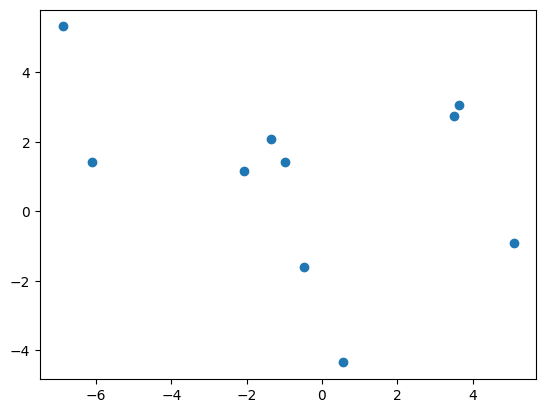

In [61]:
plt.scatter(X2[:,0], X2[:,1])

Magnifique, n'est-ce pas ? Non ? Bon tant pis, j'aurai essayé.

Revenons à nos points. Comme en $1D$, il nous faut introduire une dimension "fictive" pour invoquer le broadcast de Numpy et calculer les distances entre points. Comme nous avons plusieurs dimensions à traiter, réfléchissons calmement.

Nous voulons, à partir d'une matrice $X2$ de ligne générique $(x_i, y_i), 1 \leq i \leq 10$, construire une matrice $D$ de coefficient générique $\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2)}, 1 \leq i,j \leq 10$.

Une idée naïve consisterait à découper $X2$ en ses deux colonnes et à appliquer le `np.newaxis` indépendammant à chacune d'entre elles, mais le résultat aurait trop de coefficients, car on perdrait le lien entre les indices sous la racine. On doit donc introduire un (et un seul) `np.newaxis` à $X2$ avant de recourir au broadcasting.

Essayons alors de fixer la dernière colonne de $X2$ (celle des ordonnées) et de n'appliquer l'idée du `np.newaxis` qu'à la première colonne (celle contenant les abscisses de nos points).

Contrairement au cas de la dimension $1$, il y a une dimension supplémentaire et il faut bien prendre garde à ce qu'elle reste bien en face entre $X2$ et sa "transposée selon la première colonne". 
<!--De fait, nous sommes contraints de créer deux matrices auxiliaires pour cette raison. Le cas de la dimension $1$ masquait cette difficulté, car l'array $X$ plus haut a été traité par le broadcasting comme étant de format $(1,10)$, au lieu de simplement $(10)$, son format d'origine.

C'est tout à la fois la puissance de Numpy et un piège vicieux source d'un grand nombre d'erreurs. Prudence, toujours et lisez bien les erreurs, elles sont informatives.-->

In [62]:
X2t = X2[:,np.newaxis,:]
X2t, X2t.shape

(array([[[-6.09746062,  1.4337373 ]],
 
        [[-1.35117009,  2.0784325 ]],
 
        [[-0.47711471, -1.60174524]],
 
        [[ 5.08849684, -0.90237437]],
 
        [[ 3.64313526,  3.06152043]],
 
        [[-6.88851046,  5.32284418]],
 
        [[-0.97020497,  1.41580586]],
 
        [[-2.08295952,  1.16488871]],
 
        [[ 3.4959224 ,  2.74599356]],
 
        [[ 0.54917765, -4.34797331]]]),
 (10, 1, 2))

Jusqu'ici, le parallèle avec la dimension $1$ tient toujours. On continue en construisant une matrice de différence de coordonnées. Cette fois, compte tenu de sa taille, on ne fait ressortir que son format pour la lisibilité.

In [64]:
diff = X2 - X2t
diff.shape

(10, 10, 2)

À cette étape, il faut sortir un papier et un crayon (ou un tableau noir et une craie) pour comprendre ce que l'on fait. Nous sommes partis d'un array $X2$ contenant le coefficient $x_i$ en l'emplacement $(i,0)$, que Numpy va interpréter comme la position $(0,i,0)$ et $y_j$ en l'emplacement $(j,1)$, ou plutôt $(0,j,1)$.

L'objet $X2t$ contient, en position $(i,0,0)$ le coefficient $x_i$ et en position $(j,0,1)$ le coefficient $y_j$. Conclusion logique, la matrice de différences `diff` va contenir
- en position $(i,j,0)$ le coefficient $(x_i - x_j)$;
- en position $(i,j,1)$ le coefficient $(y_i - y_j)$.

C'est le passage le plus technique, mais une fois qu'on l'a compris (et qu'on s'est convaincus que "ça marche bien comme ça"), le plus dur est fait.

Pour passer des différences aux distances entre points, les maths nous disent qu'il faut passer au carré, sommer et prendre la racine. La première et la dernière étape sont limpides au regard de ce qui a été fait. La seconde sera l'occasion de retrouver l'opérateur de somme brièvement rencontré plus haut, avec un paramètre spécifiant l'axe (ou les axes) selon lesquels on veut sommer. Ici, la dernière dimension de notre array est celle qui indique le type de coordonnée que l'on traite (abscisse, ordonnée en $2D$), c'est donc selon cet axe qu'il faut sommer les coefficients.

In [65]:
diff2 = diff ** 2
diff2.shape

(10, 10, 2)

In [66]:
dist2 = diff2.sum(axis=2)
dist2.shape

(10, 10)

In [67]:
dist = np.sqrt(dist2)
dist, dist.shape

(array([[ 0.        ,  4.78987533,  6.38767895, 11.42729461,  9.87567142,
          3.96874189,  5.127287  ,  4.02349334,  9.6827173 ,  8.80942551],
        [ 4.78987533,  0.        ,  3.78254954,  7.09609187,  5.09014222,
          6.4178147 ,  0.76433532,  1.17050332,  4.89284615,  6.70149336],
        [ 6.38767895,  3.78254954,  0.        ,  5.60938068,  6.22274108,
          9.43694518,  3.057573  ,  3.19890622,  5.88963977,  2.93173065],
        [11.42729461,  7.09609187,  5.60938068,  0.        ,  4.2191862 ,
         13.49822396,  6.48705074,  7.46346857,  3.98081423,  5.69890961],
        [ 9.87567142,  5.09014222,  6.22274108,  4.2191862 ,  0.        ,
         10.77168263,  4.89808989,  6.03202896,  0.34817931,  8.02951874],
        [ 3.96874189,  6.4178147 ,  9.43694518, 13.49822396, 10.77168263,
          0.        ,  7.0916351 ,  6.35467651, 10.69937405, 12.20016047],
        [ 5.127287  ,  0.76433532,  3.057573  ,  6.48705074,  4.89808989,
          7.0916351 ,  0.       

Voilà, vous avez tous les outils de base pour faire de la géométrie des nuages de points en dimension quelconque, avec les applications que l'on peut imaginer en graphes (réseaux sociaux), ou en traitement du langage (plongement sémantique). La prochaine étape serait de coder un k-plus proches voisins, mais ce sera pour une autre fois.